Data Exploration & Feature construction

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import preprocessing as pp


In [ ]:
train_df = pd.read_csv(r'C:\Users\upvarma\Documents\ProjectF\DemandForecasting\CorporationFavoritaKaggle\Data\train.csv')
test_df = pd.read_csv(r'C:\Users\upvarma\Documents\ProjectF\DemandForecasting\CorporationFavoritaKaggle\Data\test.csv')
holidaysEvents_df = pd.read_csv(r'C:\Users\upvarma\Documents\ProjectF\DemandForecasting\CorporationFavoritaKaggle\Data\holidays_events.csv')
items_df = pd.read_csv(r'C:\Users\upvarma\Documents\ProjectF\DemandForecasting\CorporationFavoritaKaggle\Data\items.csv')
oil_df = pd.read_csv(r'C:\Users\upvarma\Documents\ProjectF\DemandForecasting\CorporationFavoritaKaggle\Data\oil.csv')
stores_df = pd.read_csv(r'C:\Users\upvarma\Documents\ProjectF\DemandForecasting\CorporationFavoritaKaggle\Data\stores.csv')
transactions_df = pd.read_csv(r'C:\Users\upvarma\Documents\ProjectF\DemandForecasting\CorporationFavoritaKaggle\Data\transactions.csv')


C:\Users\upvarma\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Looking at the data	

In [6]:
train_df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


Looking for days with minimum transactions

In [17]:
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [18]:
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

In [34]:
transactions_df['dayofweek'] = transactions_df['date'].dt.dayofweek

In [35]:
transactions_df.head()

,date,store_nbr,transactions,dayofweek
0,2013-01-01,25,770,1
1,2013-01-02,1,2111,2
2,2013-01-02,2,2358,2
3,2013-01-02,3,3487,2
4,2013-01-02,4,1922,2


In [36]:
dayWiseTransactions = transactions_df.groupby(by='dayofweek')['transactions'].sum()

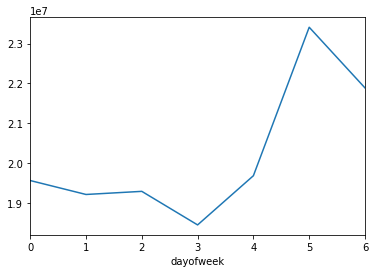

In [37]:
plt.figure(1)
dayWiseTransactions.plot()
plt.show()

Comments:
As expected the # of transactions on weekend are too heavy
This could go as a feature

In [38]:
transactions_df.groupby(by=['store_nbr', 'dayofweek']).sum()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>transactions</th>
    </tr>
    <tr>
      <th>store_nbr</th>
      <th>dayofweek</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="7" valign="top">1</th>
      <th>0</th>
      <td>416658</td>
    </tr>
    <tr>
      <th>1</th>
      <td>418655</td>
    </tr>
    <tr>
      <th>2</th>
      <td>447117</td>
    </tr>
    <tr>
      <th>3</th>
      <td>416249</td>
    </tr>
    <tr>
      <th>4</th>
      <td>421056</td>
    </tr>
    <tr>
      <th>5</th>
      <td>312589</td>
    </tr>
    <tr>
      <th>6</th>
      <td>121639</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">2</th>
      <th>0</th>
      <td>446654</td>
    </tr>
    <tr>
      <th>1</th>
      <td>443028</td>
    </tr>
    <tr>
      <th>2</th>
      <td>466684</td>
    </tr>
    <tr>
      <th>3</th>
      <td>433102</td>
    </tr>
    <tr>
      <th>4</th>
      <td>462130</td>
    </tr>
    <tr>
      <th>5</th>
      <td>500400</td>
    </tr>
    <tr>
      <th>6</th>
      <td>467903</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">3</th>
      <th>0</th>
      <td>727571</td>
    </tr>
    <tr>
      <th>1</th>
      <td>706716</td>
    </tr>
    <tr>
      <th>2</th>
      <td>751101</td>
    </tr>
    <tr>
      <th>3</th>
      <td>688792</td>
    </tr>
    <tr>
      <th>4</th>
      <td>772475</td>
    </tr>
    <tr>
      <th>5</th>
      <td>877460</td>
    </tr>
    <tr>
      <th>6</th>
      <td>842235</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">4</th>
      <th>0</th>
      <td>336766</td>
    </tr>
    <tr>
      <th>1</th>
      <td>335705</td>
    </tr>
    <tr>
      <th>2</th>
      <td>358397</td>
    </tr>
    <tr>
      <th>3</th>
      <td>324713</td>
    </tr>
    <tr>
      <th>4</th>
      <td>356064</td>
    </tr>
    <tr>
      <th>5</th>
      <td>400922</td>
    </tr>
    <tr>
      <th>6</th>
      <td>406440</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">5</th>
      <th>0</th>
      <td>345555</td>
    </tr>
    <tr>
      <th>1</th>
      <td>328039</td>
    </tr>
    <tr>
      <th>...</th>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">50</th>
      <th>5</th>
      <td>802097</td>
    </tr>
    <tr>
      <th>6</th>
      <td>736501</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">51</th>
      <th>0</th>
      <td>384524</td>
    </tr>
    <tr>
      <th>1</th>
      <td>373176</td>
    </tr>
    <tr>
      <th>2</th>
      <td>419887</td>
    </tr>
    <tr>
      <th>3</th>
      <td>363913</td>
    </tr>
    <tr>
      <th>4</th>
      <td>431285</td>
    </tr>
    <tr>
      <th>5</th>
      <td>461750</td>
    </tr>
    <tr>
      <th>6</th>
      <td>439079</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">52</th>
      <th>0</th>
      <td>36007</td>
    </tr>
    <tr>
      <th>1</th>
      <td>32174</td>
    </tr>
    <tr>
      <th>2</th>
      <td>33663</td>
    </tr>
    <tr>
      <th>3</th>
      <td>34779</td>
    </tr>
    <tr>
      <th>4</th>
      <td>40469</td>
    </tr>
    <tr>
      <th>5</th>
      <td>50116</td>
    </tr>
    <tr>
      <th>6</th>
      <td>48185</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">53</th>
      <th>0</th>
      <td>150689</td>
    </tr>
    <tr>
      <th>1</th>
      <td>147372</td>
    </tr>
    <tr>
      <th>2</th>
      <td>165520</td>
    </tr>
    <tr>
      <th>3</th>
      <td>148348</td>
    </tr>
    <tr>
      <th>4</th>
      <td>166506</td>
    </tr>
    <tr>
      <th>5</th>
      <td>202863</td>
    </tr>
    <tr>
      <th>6</th>
      <td>198784</td>
    </

The above data shows that, some stores indeed have low # of transactions on weekends
So, store_number must be used as a categorical feature in tandem with day of week

Some Features:
1) Chance that an item is sold today - (Temporal features)
	- Based on the curve of overall transactions(in all the stores)
		* To capture transactions seasonality
		- On this day of week (consider day wise)
		- On this part of the month ( consider week wise)
		- On this part of the season/quarter (see if any patterns can be found)(week wise)
		- On this part of the year (consider all the days in a month to be same- to capture the general monthly seasonality & improve perf issues)
		* Remove the earthquake occured dates to be able to better capture the generalized scenario.
	- Based on the curve of transactions per {product, family, class} (in all the stores)
		* To capture product seasonality
		- day, month, season(summer, winter etc.), year
		* There will be too many curves during feature extraction.
2) Chance that an item is sold in a particular location,(spatial features)
	- Based on the curve of overall transactions(till the entire period of training data)
		- On this store_nbr
		- In this type, city, cluster, state
	- Based on {product, family, class} variation across space
3) Use the "perishable" value while defining the "cost function" of the regression function.
4) Oil Prices
	-Have to explore the correlation to health of the economy.
		

In [65]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [66]:
oil_df = oil_df.set_index('date')


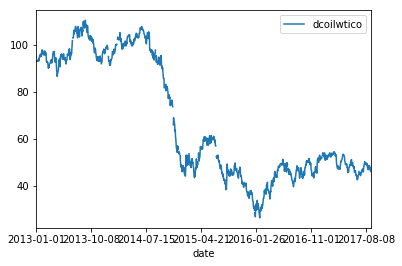

In [73]:
plt.figure()
oil_df.plot()
plt.show()

In [74]:
transactions_df.head()

,date,store_nbr,transactions,dayofweek
0,2013-01-01,25,770,1
1,2013-01-02,1,2111,2
2,2013-01-02,2,2358,2
3,2013-01-02,3,3487,2
4,2013-01-02,4,1922,2


In [165]:
dateWiseTransactions = transactions_df.groupby(by= 'date').sum()
dateWiseTransactions.drop(['store_nbr', 'dayofweek'], axis=1, inplace=True)

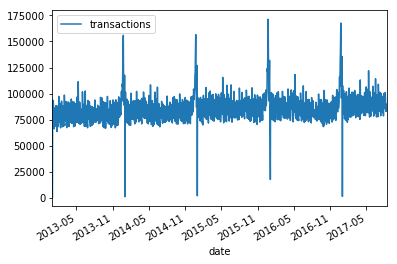

In [166]:
plt.figure()
dateWiseTransactions.plot()
plt.show()

Looking for days with minimum transactions

In [122]:
dateWiseTransactions.loc[lambda df : df.transactions <= 0, :]
dateWiseTransactions.head()

,transactions
date,
2013-01-01,770
2013-01-02,93215
2013-01-03,78504
2013-01-04,78494
2013-01-05,93573


Correlation between stock prices & transactions( health of country)

In [168]:
dateWiseTransactions
oil_df

,level_0,index,date,dcoilwtico
0,0,0,2013-01-01,NaN
1,1,1,2013-01-02,93.14
2,2,2,2013-01-03,92.97
3,3,3,2013-01-04,93.12
4,4,4,2013-01-07,93.20
5,5,5,2013-01-08,93.21
6,6,6,2013-01-09,93.08
7,7,7,2013-01-10,93.81
8,8,8,2013-01-11,93.60
9,9,9,2013-01-14,94.27


In [173]:
oil_df = oil_df.dropna()

In [186]:
dateIndexedOil_df = oil_df.set_index(['date'])
mergedTransactionsOil = dateWiseTransactions.join(dateIndexedOil_df, how='inner')
mergedTransactionsOil['transactions'].corr(mergedTransactionsOil['dcoilwtico'])

-0.30367428138381741

Looks like the correlation is not that high. But still using a normalized feature formed out of this could help out some other features.
Lets find out the correlation of oil prices with actual output label on a sample of training data set.

In [188]:
sampleTrain_df = train_df.sample(frac=0.05)


In [189]:
sampleTrain_df.head()

,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2014-10-13,32949039,15,1473480,0.671,False
2016-09-01,89695435,22,1695956,3.846,False
2014-03-04,19867214,9,1146803,6.000,NaN
2017-01-06,102169039,24,2047159,2.000,False
2013-10-25,13002956,16,1083152,3.000,NaN


In [193]:
mergedOilTrain = pd.merge(left= dateIndexedOil_df, right= sampleTrain_df, left_index=True, right_index=True)
mergedOilTrain

,dcoilwtico,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,,
2013-01-02,93.14,25296,33,414621,6.000,NaN
2013-01-02,93.14,10656,10,457471,15.000,NaN
2013-01-02,93.14,4964,5,112830,1.000,NaN
2013-01-02,93.14,14372,15,463816,1.000,NaN
2013-01-02,93.14,25897,34,265266,2.000,NaN
2013-01-02,93.14,33504,44,1089046,9.000,NaN
2013-01-02,93.14,3859,3,1089046,18.000,NaN
2013-01-02,93.14,6533,6,592942,3.000,NaN
2013-01-02,93.14,25161,33,246052,2.000,NaN


In [194]:
mergedOilTrain['unit_sales'].corr(mergedOilTrain['dcoilwtico'])

0.0065990824276414414

Looks like this is way worse.
Let's plot all the temporal, spatial hypotheses that i had to make sure they are valid.

In [223]:
#Overall Transactions
#dayofweek wise looks promising
#weekofmonth (mainly based on which part of month, rather than using the actual week #, which wouldn't capture properly)
dateWiseTransactions['wom'] = dateWiseTransactions.index
dateWiseTransactions['wom'] = dateWiseTransactions['wom'].apply(lambda  d: (d.day-1)/7 + 1)
dateWiseTransactions['wom'] = dateWiseTransactions['wom'].astype(int)
dateWiseTransactions

,transactions,wom
date,,
2013-01-01,770,1
2013-01-02,93215,1
2013-01-03,78504,1
2013-01-04,78494,1
2013-01-05,93573,1
2013-01-06,90464,1
2013-01-07,75597,1
2013-01-08,72325,2
2013-01-09,71971,2


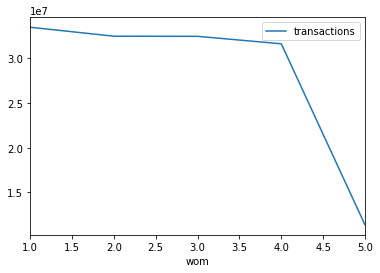

In [224]:
weekOfMonthWiseTransactions = dateWiseTransactions.groupby(['wom']).sum()
plt.figure()
weekOfMonthWiseTransactions.plot()
plt.show()

In [225]:
weekOfMonthWiseTransactions

,transactions
wom,
1,33495393
2,32491334
3,32479135
4,31642224
5,11370859


So, week of month wise info. doesn't give any variational difference. So discard this.

In [234]:
dateWiseTransactions = dateWiseTransactions.drop('wom', axis=1)


ValueError: labels ['wom'] not contained in axis

In [396]:
dateWiseTransactions = dateWiseTransactions.drop(['isSalaryDay', 'date'], axis =1)

ValueError: labels ['isSalaryDay' 'date'] not contained in axis

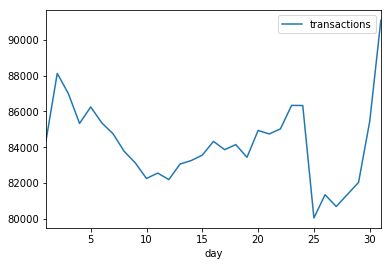

In [397]:
dateWiseTransactionsSalary = dateWiseTransactions
dateWiseTransactionsSalary['day'] = dateWiseTransactionsSalary.index
dateWiseTransactionsSalary['day'] = dateWiseTransactionsSalary['day'].dt.day
dateWiseTransactionsSalary = dateWiseTransactionsSalary.groupby(by=['day']).mean()
plt.figure(1)
dateWiseTransactionsSalary.plot()
plt.show()

There looks like hardly any spending pattern based on salary day.
Let's look at yearly data.

In [400]:
dateWiseTransactions = dateWiseTransactions.drop(['day'], axis=1)

In [406]:
monthWiseTransactions = dateWiseTransactions
monthWiseTransactions['month'] = dateWiseTransactions.index
monthWiseTransactions['month'] = monthWiseTransactions['month'].dt.month
monthWiseTransactions = monthWiseTransactions.groupby(by=['month']).mean()

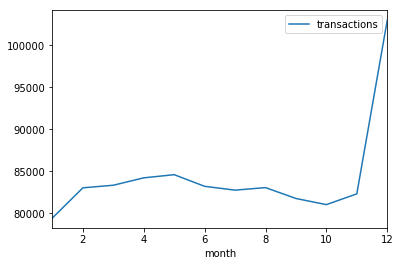

In [408]:
plt.figure(2)
monthWiseTransactions.plot()
plt.show()

Looks like there are too many transactions during december. Otherwise there isn't much of variance. But this can be helpful.
Let's look at holiday events data.

In [416]:
items_df.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [417]:
items_df['item_nbr'].unique()

array([  96995,   99197,  103501, ..., 2132957, 2134058, 2134244], dtype=int64)

In [419]:
items_df['item_nbr'].nunique()

4100

In [421]:
items_df['family'].unique()

array(['GROCERY I', 'CLEANING', 'BREAD/BAKERY', 'DELI', 'POULTRY', 'EGGS',
       'PERSONAL CARE', 'LINGERIE', 'BEVERAGES', 'AUTOMOTIVE', 'DAIRY',
       'GROCERY II', 'MEATS', 'FROZEN FOODS', 'HOME APPLIANCES', 'SEAFOOD',
       'PREPARED FOODS', 'LIQUOR,WINE,BEER', 'BEAUTY', 'HARDWARE',
       'LAWN AND GARDEN', 'PRODUCE', 'HOME AND KITCHEN II',
       'HOME AND KITCHEN I', 'MAGAZINES', 'HOME CARE', 'PET SUPPLIES',
       'BABY CARE', 'SCHOOL AND OFFICE SUPPLIES',
       'PLAYERS AND ELECTRONICS', 'CELEBRATION', 'LADIESWEAR', 'BOOKS'], dtype=object)

In [425]:
sampleTrain_df.head()

,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2014-10-13,32949039,15,1473480,0.671,False
2016-09-01,89695435,22,1695956,3.846,False
2014-03-04,19867214,9,1146803,6.000,NaN
2017-01-06,102169039,24,2047159,2.000,False
2013-10-25,13002956,16,1083152,3.000,NaN


In [477]:
productMonthWise = sampleTrain_df
productMonthWise['month'] = productMonthWise.index
productMonthWise['month'] = pd.to_datetime(productMonthWise['month'])
productMonthWise['month'] = productMonthWise['month'].dt.month
productMonthWise = productMonthWise.groupby(by=['item_nbr', 'month']).mean()

In [478]:
productMonthWise.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>id</th>
      <th>store_nbr</th>
      <th>unit_sales</th>
    </tr>
    <tr>
      <th>item_nbr</th>
      <th>month</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">96995</th>
      <th>1</th>
      <td>8.838758e+06</td>
      <td>27.666667</td>
      <td>1.916667</td>
    </tr>
    <tr>
      <th>2</th>
      <td>8.834121e+06</td>
      <td>24.333333</td>
      <td>1.750000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.788461e+07</td>
      <td>24.777778</td>
      <td>1.722222</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5.401674e+07</td>
      <td>27.114286</td>
      <td>1.857143</td>
    </tr>
    <tr>
      <th>5</th>
      <td>5.552816e+07</td>
      <td>26.821429</td>
      <td>1.785714</td>
    </tr>
  </tbody>
</table>
</div>

In [479]:
productMonthWiseAggregateDetails = productMonthWise.groupby(by=['item_nbr']).agg(['min', 'max'])
productMonthWiseAggregateDetails.head()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">id</th>
      <th colspan="2" halign="left">store_nbr</th>
      <th colspan="2" halign="left">unit_sales</th>
    </tr>
    <tr>
      <th></th>
      <th>min</th>
      <th>max</th>
      <th>min</th>
      <th>max</th>
      <th>min</th>
      <th>max</th>
    </tr>
    <tr>
      <th>item_nbr</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>96995</th>
      <td>8.834121e+06</td>
      <td>5.552816e+07</td>
      <td>24.333333</td>
      <td>38.750000</td>
      <td>1.250000</td>
      <td>38.705882</td>
    </tr>
    <tr>
      <th>99197</th>
      <td>3.215303e+07</td>
      <td>1.222684e+08</td>
      <td>22.888889</td>
      <td>39.257143</td>
      <td>1.333333</td>
      <td>13.611111</td>
    </tr>
    <tr>
      <th>103501</th>
      <td>4.558212e+07</td>
      <td>6.405304e+07</td>
      <td>23.301887</td>
      <td>27.281250</td>
      <td>4.310127</td>
      <td>5.302013</td>
    </tr>
    <tr>
      <th>103520</th>
      <td>4.853650e+07</td>
      <td>6.407397e+07</td>
      <td>26.514793</td>
      <td>28.710317</td>
      <td>2.865591</td>
      <td>7.451754</td>
    </tr>
    <tr>
      <th>103665</th>
      <td>4.783352e+07</td>
      <td>5.964639e+07</td>
      <td>26.192513</td>
      <td>28.910112</td>
      <td>3.825843</td>
      <td>4.689655</td>
    </tr>
  </tbody>
</table>
</div>

In [480]:
productMonthWiseAggregateDetails = productMonthWiseAggregateDetails.drop([('id','min'), ('store_nbr','min')], axis=1)
productMonthWiseAggregateDetails = productMonthWiseAggregateDetails.drop([('id', 'max'), ('store_nbr', 'max')], axis = 1)

In [481]:
productMonthWise = productMonthWise.join(productMonthWiseAggregateDetails, how='inner')
productMonthWise['normalizedSales'] = (productMonthWise['unit_sales'] - productMonthWise[('unit_sales','min')])/(productMonthWise[('unit_sales', 'max')] - productMonthWise[('unit_sales', 'min')])

C:\Users\upvarma\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [499]:
productMonthWise


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>id</th>
      <th>store_nbr</th>
      <th>unit_sales</th>
      <th>(unit_sales, min)</th>
      <th>(unit_sales, max)</th>
      <th>normalizedSales</th>
    </tr>
    <tr>
      <th>item_nbr</th>
      <th>month</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="12" valign="top">96995</th>
      <th>1</th>
      <td>8.838758e+06</td>
      <td>27.666667</td>
      <td>1.916667</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.017799</td>
    </tr>
    <tr>
      <th>2</th>
      <td>8.834121e+06</td>
      <td>24.333333</td>
      <td>1.750000</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.013349</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.788461e+07</td>
      <td>24.777778</td>
      <td>1.722222</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.012607</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5.401674e+07</td>
      <td>27.114286</td>
      <td>1.857143</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.016210</td>
    </tr>
    <tr>
      <th>5</th>
      <td>5.552816e+07</td>
      <td>26.821429</td>
      <td>1.785714</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.014303</td>
    </tr>
    <tr>
      <th>6</th>
      <td>5.040493e+07</td>
      <td>32.741935</td>
      <td>1.548387</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.007966</td>
    </tr>
    <tr>
      <th>7</th>
      <td>4.819082e+07</td>
      <td>31.375000</td>
      <td>1.675000</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.011347</td>
    </tr>
    <tr>
      <th>8</th>
      <td>3.691130e+07</td>
      <td>26.944444</td>
      <td>1.750000</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.013349</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1.130616e+07</td>
      <td>38.750000</td>
      <td>1.250000</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1.261055e+07</td>
      <td>34.384615</td>
      <td>1.384615</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.003594</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1.394692e+07</td>
      <td>31.083333</td>
      <td>1.791667</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.014461</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1.574845e+07</td>
      <td>37.529412</td>
      <td>38.705882</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th rowspan="12" valign="top">99197</th>
      <th>1</th>
      <td>1.032214e+08</td>
      <td>22.888889</td>
      <td>13.611111</td>
      <td>1.333333</td>
      <td>13.611111</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.058365e+08</td>
      <td>30.666667</td>
      <td>1.333333</td>
      <td>1.333333</td>
      <td>13.611111</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4.386101e+07</td>
      <td>29.500000</td>
      <td>9.500000</td>
      <td>1.333333</td>
      <td>13.611111</td>
      <td>0.665158</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4.482290e+07</td>
      <td>27.129032</td>
      <td>4.322581</td>
      <td>1.333333</td>
      <td>13.611111</td>
      <td>0.243468</td>
    </tr>
    <tr>
      <th>5</th>
      <td>7.876359e+07</td>
      <td>39.257143</td>
      <td>3.514286</td>
      <td>1.333333</td>
      <td>13.611111</td>
      <td>0.177634</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1.023876e+0

In [496]:
plot1 = productMonthWise.loc[99197]

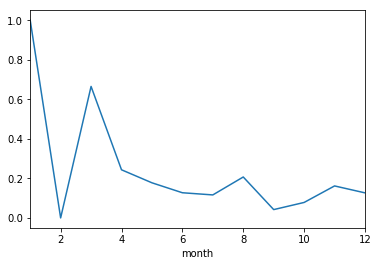

In [498]:
plt.figure(1)
plot1['normalizedSales'].plot()
plt.show()


In [503]:
plot2 = productMonthWise.loc[2113914]
plot2

,id,store_nbr,unit_sales,"(unit_sales, min)","(unit_sales, max)",normalizedSales
month,,,,,,
6,1.206296e+08,48.000000,1.000000,1.0,16.546875,0.000000
7,1.227249e+08,28.578125,16.546875,1.0,16.546875,1.000000
8,1.247773e+08,27.894737,8.026316,1.0,16.546875,0.451944


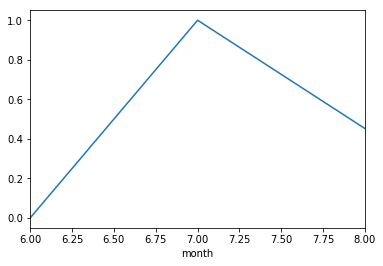

In [504]:
plt.figure(2)
plot2['normalizedSales'].plot()
plt.show()

In [543]:
monthsList = np.linspace(1,12,12).astype(int)


In [530]:
productsList = productMonthWise.reset_index()['item_nbr'].unique()

In [544]:
listArrays = [productsList, monthsList]
productsMonthsIndex = pd.MultiIndex.from_product(listArrays, names=['item_nbr', 'month'])
    

In [545]:
productMonthWiseComplete = pd.DataFrame(index=productsMonthsIndex)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
    </tr>
    <tr>
      <th>item_nbr</th>
      <th>month</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">96995</th>
      <th>1</th>
    </tr>
    <tr>
      <th>2</th>
    </tr>
    <tr>
      <th>3</th>
    </tr>
    <tr>
      <th>4</th>
    </tr>
    <tr>
      <th>5</th>
    </tr>
  </tbody>
</table>
</div>

In [550]:
productMonthWiseComplete = productMonthWiseComplete.join(productMonthWise, how='outer')

In [552]:
productMonthWiseComplete.fillna(value=0)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>id</th>
      <th>store_nbr</th>
      <th>unit_sales</th>
      <th>(unit_sales, min)</th>
      <th>(unit_sales, max)</th>
      <th>normalizedSales</th>
    </tr>
    <tr>
      <th>item_nbr</th>
      <th>month</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="12" valign="top">96995</th>
      <th>1</th>
      <td>8.838758e+06</td>
      <td>27.666667</td>
      <td>1.916667</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.017799</td>
    </tr>
    <tr>
      <th>2</th>
      <td>8.834121e+06</td>
      <td>24.333333</td>
      <td>1.750000</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.013349</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.788461e+07</td>
      <td>24.777778</td>
      <td>1.722222</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.012607</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5.401674e+07</td>
      <td>27.114286</td>
      <td>1.857143</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.016210</td>
    </tr>
    <tr>
      <th>5</th>
      <td>5.552816e+07</td>
      <td>26.821429</td>
      <td>1.785714</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.014303</td>
    </tr>
    <tr>
      <th>6</th>
      <td>5.040493e+07</td>
      <td>32.741935</td>
      <td>1.548387</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.007966</td>
    </tr>
    <tr>
      <th>7</th>
      <td>4.819082e+07</td>
      <td>31.375000</td>
      <td>1.675000</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.011347</td>
    </tr>
    <tr>
      <th>8</th>
      <td>3.691130e+07</td>
      <td>26.944444</td>
      <td>1.750000</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.013349</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1.130616e+07</td>
      <td>38.750000</td>
      <td>1.250000</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1.261055e+07</td>
      <td>34.384615</td>
      <td>1.384615</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.003594</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1.394692e+07</td>
      <td>31.083333</td>
      <td>1.791667</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>0.014461</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1.574845e+07</td>
      <td>37.529412</td>
      <td>38.705882</td>
      <td>1.250000</td>
      <td>38.705882</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th rowspan="12" valign="top">99197</th>
      <th>1</th>
      <td>1.032214e+08</td>
      <td>22.888889</td>
      <td>13.611111</td>
      <td>1.333333</td>
      <td>13.611111</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.058365e+08</td>
      <td>30.666667</td>
      <td>1.333333</td>
      <td>1.333333</td>
      <td>13.611111</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4.386101e+07</td>
      <td>29.500000</td>
      <td>9.500000</td>
      <td>1.333333</td>
      <td>13.611111</td>
      <td>0.665158</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4.482290e+07</td>
      <td>27.129032</td>
      <td>4.322581</td>
      <td>1.333333</td>
      <td>13.611111</td>
      <td>0.243468</td>
    </tr>
    <tr>
      <th>5</th>
      <td>7.876359e+07</td>
      <td>39.257143</td>
      <td>3.514286</td>
      <td>1.333333</td>
      <td>13.611111</td>
      <td>0.177634</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1.023876e+0

Normalization of data for moving from product to family type

In [554]:
items_df.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [556]:
sampleTrain_df.head()

,id,store_nbr,item_nbr,unit_sales,onpromotion,month
date,,,,,,
2014-10-13,32949039,15,1473480,0.671,False,10
2016-09-01,89695435,22,1695956,3.846,False,9
2014-03-04,19867214,9,1146803,6.000,NaN,3
2017-01-06,102169039,24,2047159,2.000,False,1
2013-10-25,13002956,16,1083152,3.000,NaN,10


In [561]:
familyTrain = sampleTrain_df.reset_index().merge(items_df, how='inner', on='item_nbr').set_index('date')

In [591]:
familyTrain.head()

,item_nbr,unit_sales,family
date,,,
2014-10-13,1473480,0.671,PRODUCE
2016-11-14,1473480,1.150,PRODUCE
2017-02-13,1473480,19.586,PRODUCE
2015-08-17,1473480,3.189,PRODUCE
2015-12-06,1473480,4.779,PRODUCE


In [606]:
familyTrain = familyTrain.drop(['date'], axis=1)

In [612]:
familyTrain.head()

,item_nbr,unit_sales,family
date,,,
2014-10-13,1473480,0.671,PRODUCE
2016-11-14,1473480,1.150,PRODUCE
2017-02-13,1473480,19.586,PRODUCE
2015-08-17,1473480,3.189,PRODUCE
2015-12-06,1473480,4.779,PRODUCE


In [616]:
familyTrain.index = pd.to_datetime(familyTrain.index)

In [620]:
familyTrain['date'] = familyTrain.index

In [649]:
familyTrain['dayofweek'] = familyTrain['date'].dt.dayofweek

In [653]:
#familyTrain.head()
normalizedFamilyTrain = familyTrain.loc[:,['item_nbr','unit_sales']]


In [654]:
normalizedFamilyTrain.head()
#familyTrain.groupby(by='family').

,item_nbr,unit_sales
date,,
2014-10-13,1473480,0.671
2016-11-14,1473480,1.150
2017-02-13,1473480,19.586
2015-08-17,1473480,3.189
2015-12-06,1473480,4.779


In [1]:
normalizedFamilyTrain = normalizedFamilyTrain.reset_index()
normalizedFamilyTrain = normalizedFamilyTrain.groupby(by=['item_nbr']).transform(lambda  x : pp.maxabs_scale(x))

NameError: name 'normalizedFamilyTrain' is not defined

In [9]:
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [11]:
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
transactions_df['dayOfWeek'] = transactions_df['date'].dt.dayofweek
overallDayWiseTemporalDist = transactions_df.groupby(by=['dayOfWeek']).mean()


In [12]:
overallDayWiseTemporalDist

,store_nbr,transactions
dayOfWeek,,
0,26.936784,1635.556903
1,26.941814,1601.308520
2,26.934174,1621.497604
3,26.934213,1549.699882
4,26.934953,1653.989243
5,26.958962,1952.675786
6,26.933575,1847.259706


In [15]:
overallDayWiseTemporalDist['transactions'] = pp.maxabs_scale(overallDayWiseTemporalDist['transactions'])

In [17]:
overallDayWiseTemporalDist['transactions2'] = pp.minmax_scale(overallDayWiseTemporalDist['transactions'])

In [19]:
overallDayWiseTemporalDist

,store_nbr,transactions,transactions2
dayOfWeek,,,
0,26.936784,0.837598,0.213057
1,26.941814,0.820059,0.128069
2,26.934174,0.830398,0.178169
3,26.934213,0.793629,0.000000
4,26.934953,0.847037,0.258798
5,26.958962,1.000000,1.000000
6,26.933575,0.946015,0.738406


In [21]:
train_df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [30]:
currentTrain_df = train_df.sample(frac=0.001)
templateDayWiseTransactions = pd.MultiIndex.from_product([currentTrain_df['item_nbr'].unique(),np.linspace(1, 7, 7).astype(int)])


In [50]:
currentTrain_df = train_df.loc[:,['date', 'item_nbr', 'unit_sales']]
currentTrain_df['date'] = pd.to_datetime(currentTrain_df['date'])
currentTrain_df['dayOfWeek'] = currentTrain_df['date'].dt.dayofweek
productDayWiseTransactions = currentTrain_df.groupby(by=['item_nbr','dayOfWeek'])['unit_sales'].mean()

#Template to deal with missing data
templateDayWiseTransactions = pd.DataFrame(index= pd.MultiIndex.from_product([currentTrain_df['item_nbr'].unique(),np.linspace(0, 6, 7).astype(int)], names=['item_nbr', 'dayOfWeek']))
productDayWiseTransactions = templateDayWiseTransactions.join(productDayWiseTransactions, how='outer')
productDayWiseTransactions = productDayWiseTransactions.fillna(value= 0)

In [51]:
#MaxAbsScaler
productDayWiseTransactions.groupby(level=['item_nbr']).transform(lambda x: pp.maxabs_scale(x))


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>unit_sales</th>
    </tr>
    <tr>
      <th>item_nbr</th>
      <th>dayOfWeek</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="7" valign="top">96995</th>
      <th>0</th>
      <td>0.645949</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.589025</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.565111</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.545096</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.667182</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.687543</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">99197</th>
      <th>0</th>
      <td>0.775651</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.910563</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.702446</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.677468</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.762989</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.714164</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">103501</th>
      <th>0</th>
      <td>0.801465</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.768849</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.669532</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.637945</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.638185</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.945521</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">103520</th>
      <th>0</th>
      <td>0.820183</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.823316</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.877030</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.899002</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.951551</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.875168</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">103665</th>
      <th>0</th>
      <td>0.646052</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.617716</td>
    </tr>
    <tr>
      <th>...</th>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th rowspan="2" valign="top">2123863</th>
      <th>5</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">2124052</th>
      <th>0</th>
      <td>0.294104</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.370757</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.344329</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.563185</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.926468</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.709840</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">2126842</th>
      <th>0</th>
      <td>0.428571</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.642857</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.857143</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.428571</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th rowspan="7" valign="top">2126944</th>
      <th>0</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>4</t

In [48]:
productDayWiseTransactions.loc[96995,0]

unit_sales    0.833333
Name: (96995, 0), dtype: float64